In [91]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(os.path.join(os.getcwd(), 'kmeans_custom'))
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from kmeans import KMeansCustom

# KMeans Algorithm with Iris dataset

We'll be working with the iris dataset. This dataset consists of three different Iris species (Setosa, Versicolour and Virginica), with the following characteristics: length and width of sepals and petals in centimeters. 

In [92]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
data, target = shuffle(data, target, random_state=42)

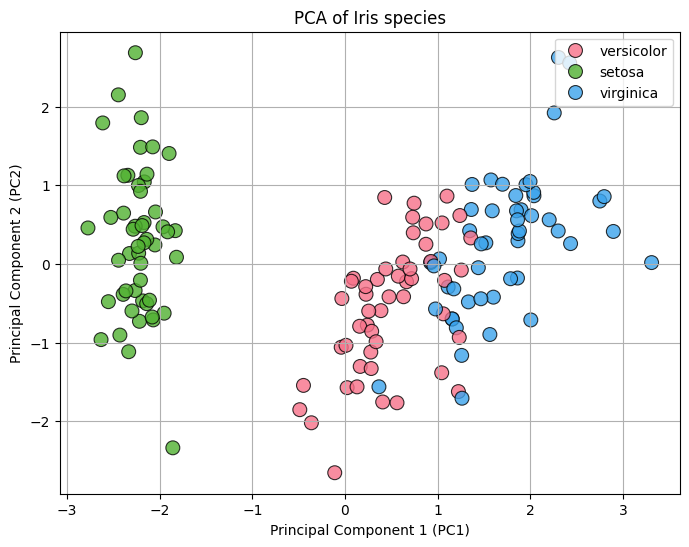

In [107]:
df = pd.DataFrame(data, columns=iris.feature_names)
df['species'] = target_names[target]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

import pandas as pd
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['species'] = target_names[target]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='husl', s=100, edgecolor='k', alpha=0.8)
plt.title('PCA of Iris species')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Application of the KMeansCustom algorithm

In [94]:
kmeansCustom = KMeansCustom(n_clusters=3)
kmeansCustom.fit(data)
predictions_from_kmeans_custom = kmeansCustom.predict(data)

In [95]:
rand_score = adjusted_rand_score(target, predictions_from_kmeans_custom)
print(f"Indice de Rand ajusté : {rand_score}")

Indice de Rand ajusté : 0.7163421126838476


In [96]:
cm = confusion_matrix(target, predictions_from_kmeans_custom)
print("Matrice de confusion :")
print(cm)

Matrice de confusion :
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


## Application of Scikit-Learn's KMeans algorithm

In [97]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
predictions_from_kmeans = kmeans.predict(data)

c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [98]:
rand_score = adjusted_rand_score(target, predictions_from_kmeans)
print(f"Indice de Rand ajusté : {rand_score}")

Indice de Rand ajusté : 0.7302382722834697


In [99]:
cm = confusion_matrix(target, predictions_from_kmeans)
print("Matrice de confusion :")
print(cm)

Matrice de confusion :
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


## Tests of the KMeansCustom algorithm with several k values

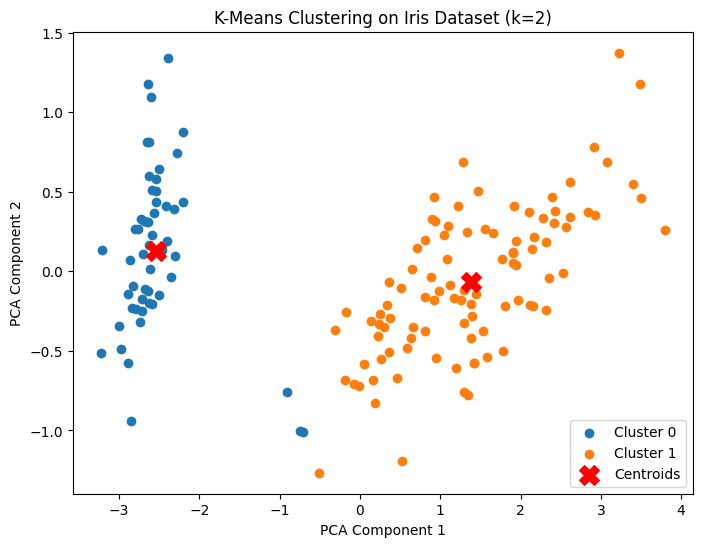

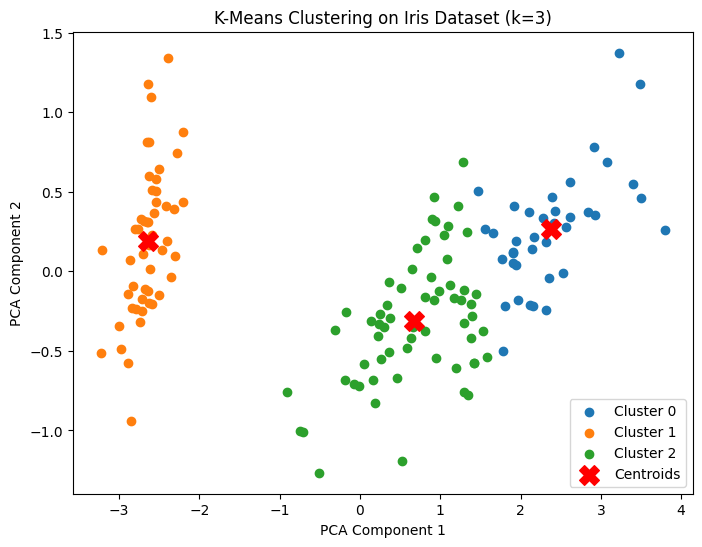

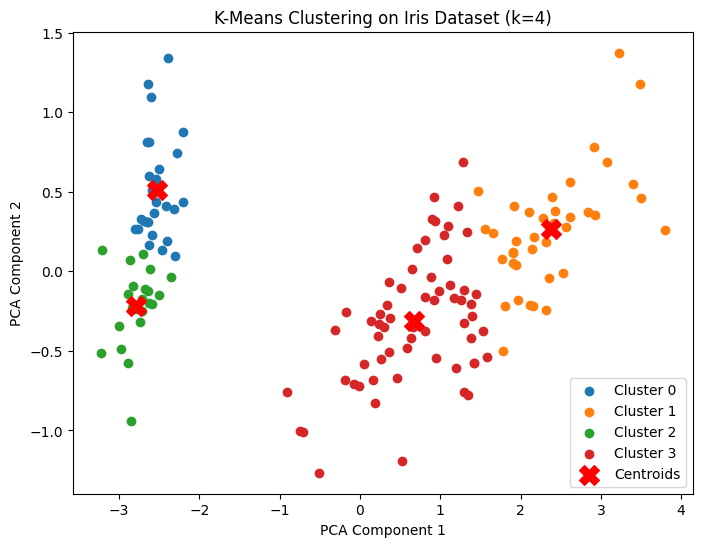

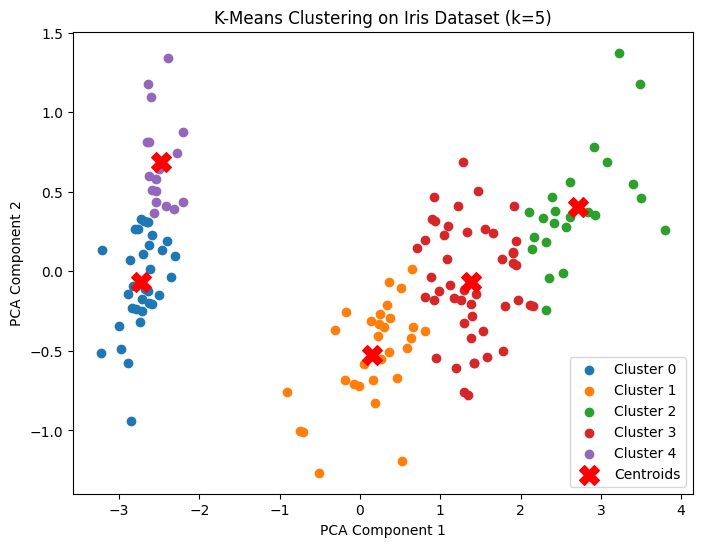

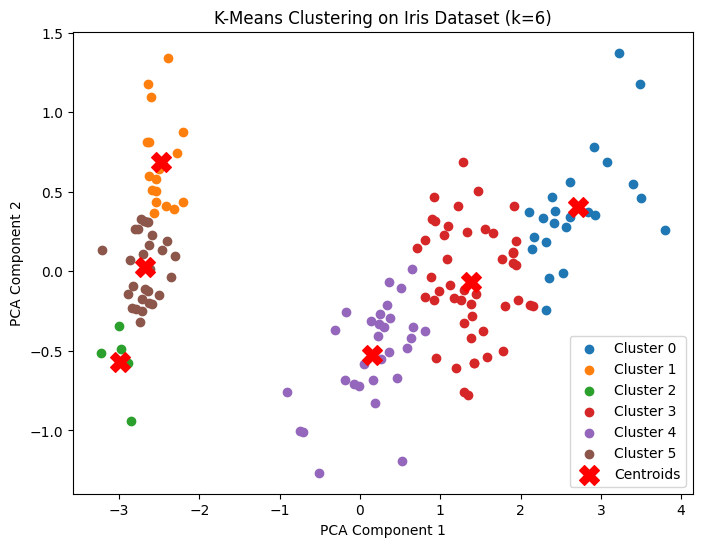

In [106]:
k_values = [2, 3, 4, 5, 6]
silhouette_scores = {}

for k in k_values:
    kmeansCustom = KMeansCustom(n_clusters=k)
    kmeansCustom.fit(data)
    predictions_from_kmeans_custom = kmeansCustom.predict(data)

    score = silhouette_score(data, predictions_from_kmeans_custom)
    silhouette_scores[k] = score
    
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data)
    
    plt.figure(figsize=(8, 6))
    for i in range(k):
        points = data_reduced[np.array(predictions_from_kmeans_custom) == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
    plt.scatter(pca.transform(kmeansCustom.centroids)[:, 0], pca.transform(kmeansCustom.centroids)[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'K-Means Clustering on Iris Dataset (k={k})')
    plt.show()

Silhouette score for k=2: 0.6810461692117462
Silhouette score for k=3: 0.5511916046195919
Silhouette score for k=4: 0.41376681624285133
Silhouette score for k=5: 0.3598362629083765
Silhouette score for k=6: 0.46563801363612545


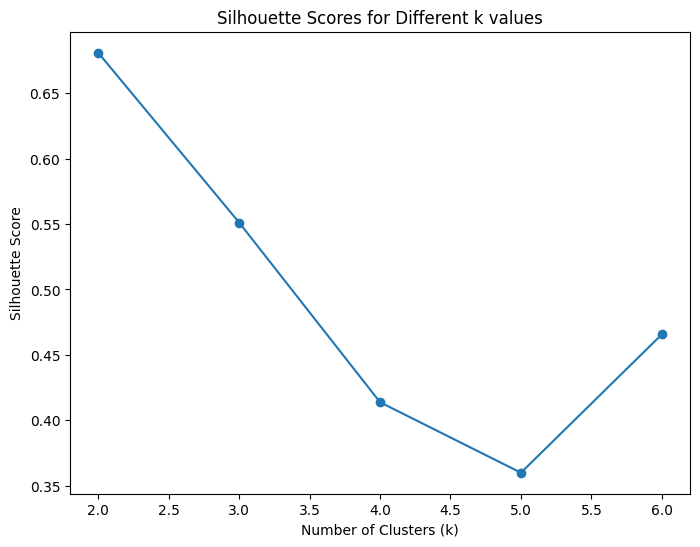

In [101]:
for k, score in silhouette_scores.items():
    print(f"Silhouette score for k={k}: {score}")

plt.figure(figsize=(8, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k values')
plt.show()